<a href="https://colab.research.google.com/github/xdderekchen/ML/blob/master/run_sparklyR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming in R on Google Colab platform

Google colab is a great platform for writing and running python code, from simple "hello, world" code, to advanced data engineering with Spark, fancy machine learning / deep learning algorithms. Other great features are:
 * integration with github repository
 * using google drive as the data storage
 * free for simple usage, perfect platform for learning purpose
 * support python 2, python 3.

After programming python on colab for a while, I started to wonder whether I can use colab notebook for R. After some research, I found the answer. In this papar, I list the steps so you can use R kernel to program in sparklyR.

**STEP 1**. When you open a new notebook on colab, by default, the notebook only supports python. In order to use R kernet, you need to open this link in your browser

https://colab.research.google.com/notebook#create=true&language=r

Now open a "Code" cell, where you should be able to enter/run R code and use your favorate R libraries.


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...
NULL


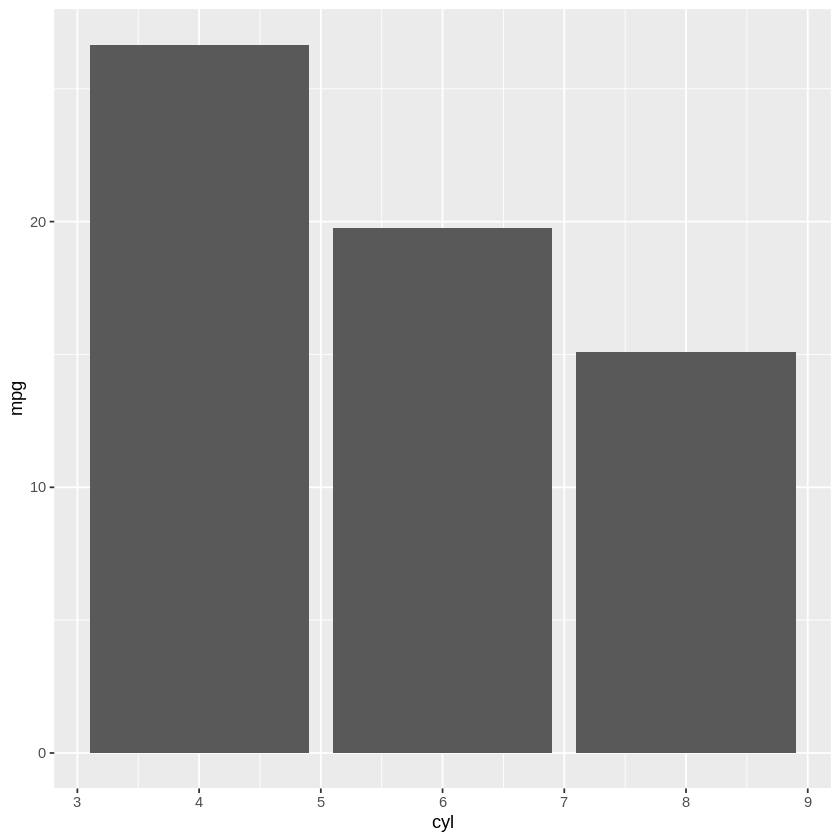

In [3]:
library(dplyr)
library(ggplot2)
print(str(mtcars))
mtcars %>% 
    group_by(cyl) %>% 
    summarise(mpg= mean(mpg)) %>% 
    ggplot(aes(cyl, mpg))+ geom_bar(stat="identity")


Do this step only if you want to code in spark and sparklyr.

**Step 2**: Download spark, install sparklyr package and configure JAVA 8. 

You need to run *spark_available_versions()* first run what is avaible for spark release, then run *sparl_install()* accordingly.

By default, colab uses JVM version 9. So we need to specify JAVA_HOME to point to version 8.

In [0]:
devtools::install_github(repo = "rstudio/spark-install", subdir = "R")
library(sparkinstall)

# lists the versions available to install
#spark_available_versions()
# select one from the list output from the above function
spark_install(version = "2.4.3", hadoop_version = "2.7")

#Set java JVM version 8
Sys.setenv(JAVA_HOME='/usr/lib/jvm/java-8-openjdk-amd64')

install.packages("sparklyr")

In [6]:
install.packages("dbplot")
library(sparklyr)
library(dbplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘sparklyr’


The following objects are masked from ‘package:sparkinstall’:

    spark_available_versions, spark_default_version, spark_install,
    spark_install_dir, spark_install_find, spark_install_tar,
    spark_installed_versions, spark_uninstall, spark_versions




OK, let's try to use sparklyr api.

Warning message:
“Missing values are always removed in SQL.
Use `mean(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”


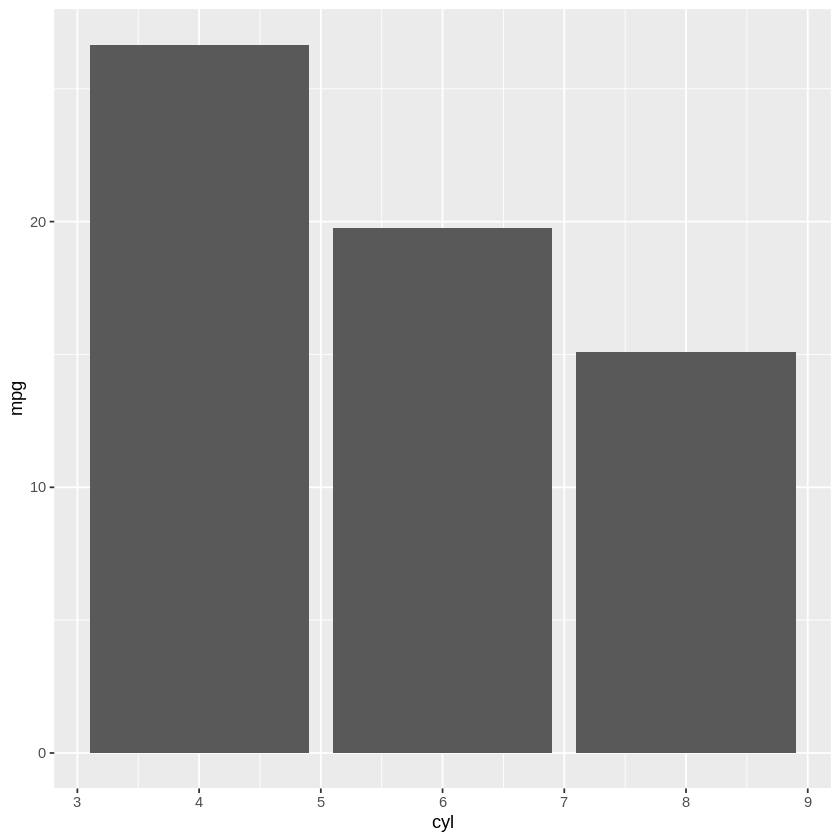

In [7]:
sc <- spark_connect(master="local", version="2.4.3")
spark_is_ready <- connection_is_open(sc)

# bring R dataframe into spark,
cars <- copy_to(sc, mtcars, overwrite = TRUE)

# operations use dplyr and ggplots
car_mpg <- cars %>% 
    group_by(cyl) %>% 
    summarise(mpg= mean(mpg)) %>% 
    ggplot(aes(cyl, mpg))+ geom_bar(stat="identity")
car_mpg

In [8]:
cars %>% ml_linear_regression(wt ~ mpg) %>% summary()

Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-0.6516 -0.3490 -0.1381  0.3190  1.3684 

Coefficients:
(Intercept)         mpg 
   6.047255   -0.140862 

R-Squared: 0.7528
Root Mean Squared Error: 0.4788


Observations: ??
Variables: 14
Database: spark_connection
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, …
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, …
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.950…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4…
$ tax     <int> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 3…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 1…
$ b       <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 3

Formula: medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat

Coefficients:
  (Intercept)          crim            zn         indus          chas 
 34.454788738  -0.129772215   0.049578540   0.014917698   2.542392162 
          nox            rm           age           dis           rad 
-18.101563037   3.850380292   0.005457293  -1.508197739   0.383372586 
          tax       ptratio             b         lstat 
 -0.015858159  -0.826390484   0.010096331  -0.538359585 

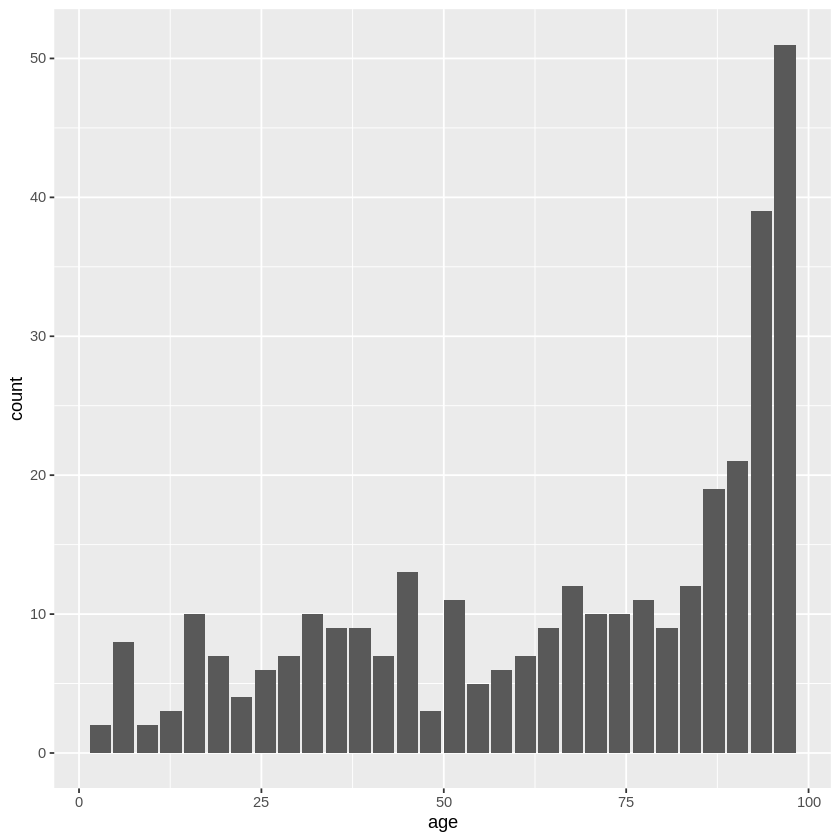

In [9]:

download.file(
  "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv",
  "BostonHousing.csv")

data_df <- spark_read_csv(
  sc, 
  path =   "BostonHousing.csv", 
  memory = FALSE
) 

glimpse(data_df)

data_splits <- sdf_random_split(data_df, training = 0.67, testing = 0.33, seed = 42)
df_train <- data_splits$training
df_test <- data_splits$testing

dbplot_histogram(df_train, age)

lr <- ml_linear_regression(
  df_train, medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat 
)
lr

OK, Let's try to save/read data to parquet file.

In [14]:
  spark_write_parquet(data_df, "contents/BOST", mode = "overwrite")

  data_df2 <- spark_read_parquet(sc, path="contents/BOST")

  glimpse(data_df2)

Observations: ??
Variables: 14
Database: spark_connection
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, …
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, …
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.950…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4…
$ tax     <int> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 3…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 1…
$ b       <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 3

Please remember to disconnet from the spark server.

In [0]:
spark_disconnect(sc)